# Titanic the unsinkable ship that sunk (but still navigate on the web)

This is my take on the famous and still very afloat titanic dataset

I'll try to get answers to the folowing questions:
    - Wich class had more passengers
    - The average passenger age and sex distribution between classes and embarking city
    - Wich class had more surviors
    - Wich class had more deceased
    - Of the three ports, which one had more survivors, and more deceased
    - Average age of survivors and deceased
    - Survival rate between sexes and classes
    
And after figuring the above questions out, i'll attempt my first ML model to predict if a new carry of passengers would survive

### Data dictionary

survival - Survival - 0 = No, 1 = Yes </br>
pclass - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd </br>
(1st = Upper, 2nd = Middle, 3rd = Lower) </br>
sex - Sex </br>
Age - Age in years </br>
sibsp - # of siblings / spouses aboard the Titanic  </br>
(Sibling = brother, sister, stepbrother, stepsister / Spouse = husband, wife (mistresses and fiancés were ignored))</br>
parch - # of parents / children aboard the Titanic </br>
(Parent = mother, father / Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.)</br>
ticket - Ticket number </br>
fare - Passenger fare </br>
cabin - Cabin number </br>
embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton </br>


In [1]:
# Importing the libraries used in this notebok

import pandas as pd
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Plotting the graphs on the notebook 
%matplotlib inline

# Setting the style to the seaborn graphs
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale = 1.3)

# Ignoring some warnings that came up along the way
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file and taking a 'pre-look' on the data
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ok, we have 891 entries with 12 features or columns
But on the Age, Cabin and Embarked columns, we have some missing data to deal with

In [3]:
# Actually looking at the entries
df_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We got a lot of NaN values on the cabin column, but luckly all the entries have the column Pclass filled with the class of the cabin, it's kinda redundant wich is good in this case.


## Ship Layout
 To better illustrate the data that we're working, i marked out the distribution of each cabin class on the ship. (And added DiCaprio too)
 click on the image to see it in fullsize
 
 Image font and credits: https://www.britannica.com/topic/Sinking-of-the-Titanic-The-100th-Anniversary-The-1883795

<a href = 'https://imgur.com/a/0Ca16CB'><img src ='Titanic.png'></a>

## Wich class had the most passengers?

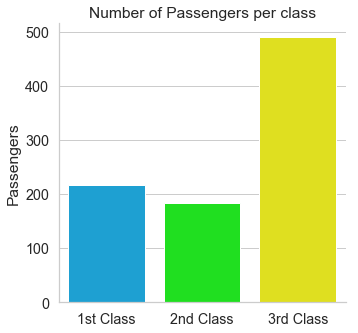

In [4]:
# Checking the number of passengers per class

sns.catplot(x = 'Pclass', data = df_train, kind = 'count', palette = ["#00aef0", "#00ff00", "#ffff00"])
plt.xticks([0,1,2], ('1st Class', '2nd Class', '3rd Class'))
plt.xlabel('')
plt.ylabel('Passengers')
plt.title('Number of Passengers per class')
plt.show()

## The average passenger age and sex distribution between classes and embarking city

Now i want to know more about theese passengers and their ages. But first i got to handle the missing ages.
The missing ages in this case don't represent newborn child with less than 1yr old, so i will work just with actually missing data, as shown below

In [5]:
# Quick look on the Ages stats.
# Note that missing values, or NaN do not show up and the minimal age registered its a 4 month old newborn

df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
# Checking for missing ages
df_train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [7]:
# Filling in the missing data with the average age
df_train['Age'].fillna(value = df_train['Age'].mean(), inplace = True)

Now i cat plot a more accurate graph and compare the average age between sex and classes

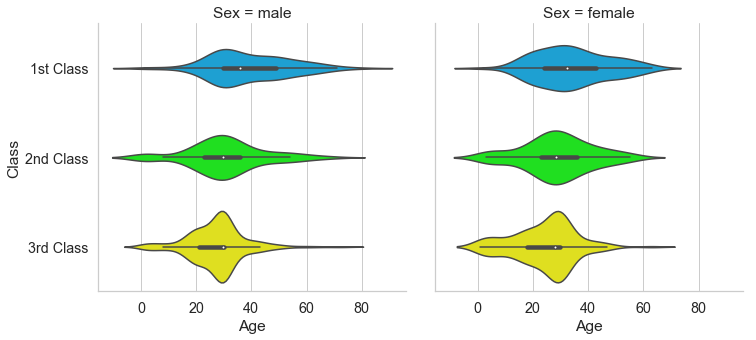

--------------------------------------------------
Average age of Male passengers of all classes: 30.5 years old
Average age of Female passengers of all classes: 28.2 years old
--------------------------------------------------


In [8]:
# This took me a while to figure out, so i'll detail the graph part

# Generating the plot and saving it on the 'a' object. The 'col= 'Sex'' bit is the responsable for plotting the 2 graphs side by side
a = sns.catplot(x = 'Age', y = 'Pclass', data = df_train, col = 'Sex', 
            kind = 'violin', orient = 'h', palette = ["#00aef0", "#00ff00", "#ffff00"])

# Now im setting the label on the Y axis
a.set_axis_labels(y_var = 'Class')

# And with the plt.yticks im setting the labels without changing the dataframe itself
plt.yticks([0,1,2],['1st Class', '2nd Class', '3rd Class'])
plt.show()

#And some aditional info printed using the .loc method
print('-'*50)
print('Average age of Male passengers of all classes: {:.1f} years old'.format(df_train.loc[(df_train.Sex == 'male'), 'Age'].mean()))
print('Average age of Female passengers of all classes: {:.1f} years old'.format(df_train.loc[(df_train.Sex == 'female'), 'Age'].mean()))
print('-'*50)

So we already know wich class had more passengers, and now i want to know where theese people embarked and wich class they embarked to


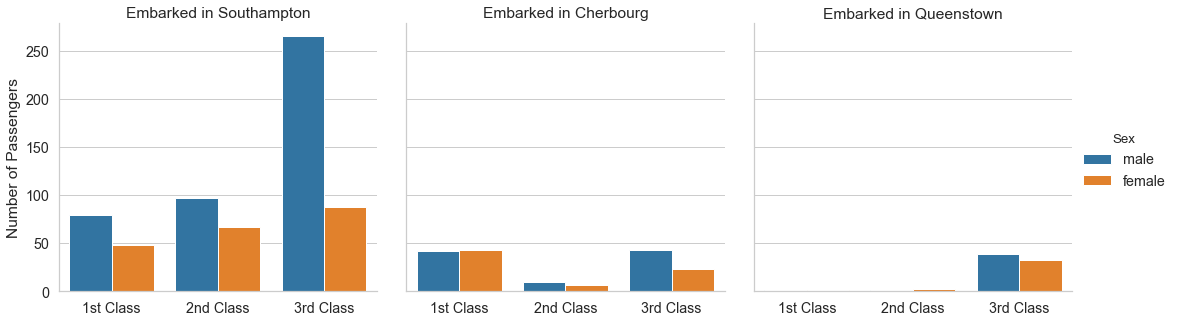

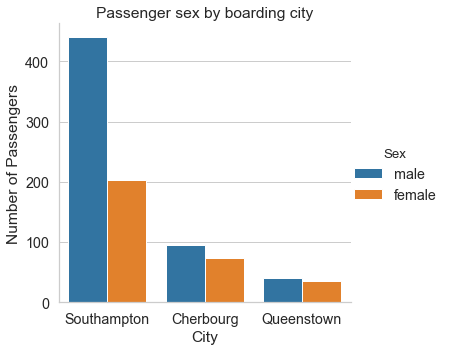

In [9]:
# I had to replace the letters by the names of the cities to show properly on the plot below
df_cities = df_train.copy()
df_cities['Embarked'] = df_cities.Embarked.replace('S','Southampton')
df_cities['Embarked'] = df_cities.Embarked.replace('C','Cherbourg')
df_cities['Embarked'] = df_cities.Embarked.replace('Q','Queenstown')


# Checking the sex of passengers per class
b = sns.catplot(x = 'Pclass', data = df_cities, kind = 'count', col = 'Embarked', hue = 'Sex')
b.set_axis_labels(x_var = '',y_var = 'Number of Passengers')
b.set_xticklabels(['1st Class','2nd Class','3rd Class'])

# {col_name} in this case represents the variables that i replaced on the dataframe
b.set_titles('Embarked in {col_name}')

# Checking the sex of passengers per embarking (or boarding, i dont really know) city
c = sns.catplot(x = 'Embarked', data = df_cities, kind = 'count', hue = 'Sex')
c.set_axis_labels(x_var = 'City',y_var = 'Number of Passengers')
plt.title('Passenger sex by boarding city')
plt.show()

We can see that the majority of embarks in Southhampton were from male passengers, mainly on 3rd Class, now in Cheerbourg the embarks was more even between the sexes and classes and in Queenstown basicly only embarked passengers for the 3rd Class

## Wich class had more surviors and deceased?

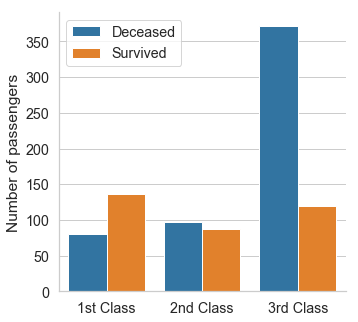

--------------------------------------------------
Number of survivors in 1st class: 136
Number of deceased in 1st class: 80

Number of survivors in 2nd class: 87
Number of deceased in 2nd class: 97

Number of survivors in 3rd class: 119
Number of deceased in 3rd class: 372
--------------------------------------------------


In [10]:
# Checking the survival/deceased data from the classes
d = sns.catplot(x = 'Pclass', data = df_train, hue = 'Survived', kind = 'count', legend_out = False)
d.set_xticklabels(['1st Class','2nd Class','3rd Class'])
d.set_axis_labels(x_var = '',y_var = 'Number of passengers')
plt.legend(['Deceased','Survived'])
plt.show()

# Printing a 'mini report' to go along w/ the graph
print('-'*50)
print('Number of survivors in 1st class: {}'.format(df_train.loc[(df_train.Survived == 1) & (df_train.Pclass == 1), 'Pclass'].count()))
print('Number of deceased in 1st class: {}'.format(df_train.loc[(df_train.Survived == 0) & (df_train.Pclass == 1), 'Pclass'].count()))

print('\nNumber of survivors in 2nd class: {}'.format(df_train.loc[(df_train.Survived == 1) & (df_train.Pclass == 2), 'Pclass'].count()))
print('Number of deceased in 2nd class: {}'.format(df_train.loc[(df_train.Survived == 0) & (df_train.Pclass == 2), 'Pclass'].count()))

print('\nNumber of survivors in 3rd class: {}'.format(df_train.loc[(df_train.Survived == 1) & (df_train.Pclass == 3), 'Pclass'].count()))
print('Number of deceased in 3rd class: {}'.format(df_train.loc[(df_train.Survived == 0) & (df_train.Pclass == 3), 'Pclass'].count()))
print('-'*50)

As we saw in the begining of the notebook, the 3rd class was the furthest to the main deck and the top decks, were the lifeboats where.
Which justyfies the bigger number of deaths on 3rd class (wich was DiCaprio's class on the movie by the way)(R.I.P Jack)

[INSERT GIF HERE]

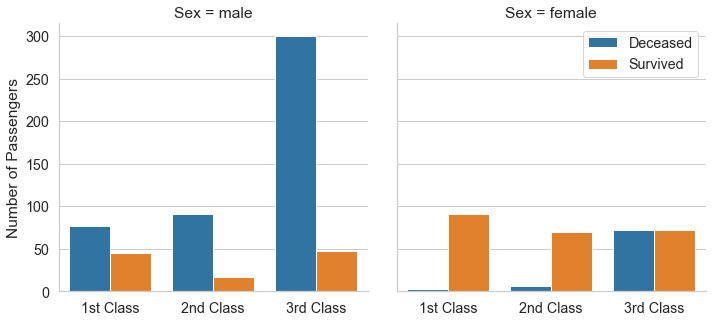

--------------------------------------------------

Total of male passengers that survived across all classes: 109
Total of female passengers that survived across all classes: 233

Total of male passengers deceased across all classes: 468
Total of female passengers deceased across all classes: 81

--------------------------------------------------


In [11]:
# Checking deaths by class and sex
e = sns.catplot(x = 'Pclass', hue = 'Survived', data = df_train, col = 'Sex', 
            kind = 'count', orient = 'h', legend = False, legend_out = True)

# Now im setting the label on the Y axis
e.set_axis_labels(x_var = '',y_var = 'Number of Passengers')
e.set_xticklabels(['1st Class','2nd Class','3rd Class'])

plt.legend(['Deceased','Survived'], loc = 0)
plt.show()

# '# Printing a 'mini report' to go along w/ the graph
print('-'*50)
print('\nTotal of male passengers that survived across all classes: {}'
      .format(df_train.loc[(df_train.Survived == 1) & (df_train.Sex == 'male'),'Pclass' ].count()))
print('Total of female passengers that survived across all classes: {}'
      .format(df_train.loc[(df_train.Survived == 1) & (df_train.Sex == 'female'),'Pclass' ].count()))

print('\nTotal of male passengers deceased across all classes: {}'
      .format(df_train.loc[(df_train.Survived == 0) & (df_train.Sex == 'male'),'Pclass' ].count()))
print('Total of female passengers deceased across all classes: {}\n'
      .format(df_train.loc[(df_train.Survived == 0) & (df_train.Sex == 'female'),'Pclass' ].count()))
print('-'*50)

## Survival rate between sexes and classes

Woman and childern first! everybody else has to wait (they might die, but they'll wait)

In this part of the analysis we'll see the death rates and the average age of the deceased passengers and passengers that survived

In [12]:
# Big block o'code, just to get some numbers *sigh* (this took waaaay longer than necessary...)
# But basicly im picking some numbers by class and sex to calc the death rates

# Total of embarked pessengers
T_Passengers = df_train.shape[0] 
# Total of deaths
T_Deaths = df_train.loc[(df_train.Survived == 0)].shape[0] 

# Total of passengers by sex
T_FemPassengers = df_train.loc[(df_train.Sex == 'female'), 'Sex'].count() 
T_MalePassengers = df_train.loc[(df_train.Sex == 'male'), 'Sex'].count() 

# Deaths by sex
T_FemDeath = df_train.loc[(df_train.Survived == 0)&(df_train.Sex == 'female'), 'Sex'].count()
T_MaleDeath = df_train.loc[(df_train.Survived == 0)&(df_train.Sex == 'male'), 'Sex'].count()

# 1st Class
T_Passengers1st = df_train.loc[(df_train.Pclass == 1),'Pclass'].count()
T_FemDeath1st = df_train.loc[(df_train.Pclass == 1)&(df_train.Sex == 'female')&(df_train.Survived == 0),'Sex'].count()
T_MaleDeath1st = df_train.loc[(df_train.Pclass == 1)&(df_train.Sex == 'male')&(df_train.Survived == 0),'Sex'].count()
T_Deaths1st = T_FemDeath1st + T_MaleDeath1st 

# 2nd Class
T_Passengers2nd = df_train.loc[(df_train.Pclass == 2),'Pclass'].count()
T_FemDeath2nd = df_train.loc[(df_train.Pclass == 2)&(df_train.Sex == 'female')&(df_train.Survived == 0),'Sex'].count()
T_MaleDeath2nd = df_train.loc[(df_train.Pclass == 2)&(df_train.Sex == 'male')&(df_train.Survived == 0),'Sex'].count()
T_Deaths2nd = T_FemDeath2nd + T_MaleDeath2nd 

# 3rd Class
T_Passengers3rd = df_train.loc[(df_train.Pclass == 3),'Pclass'].count()
T_FemDeath3rd = df_train.loc[(df_train.Pclass == 3)&(df_train.Sex == 'female')&(df_train.Survived == 0),'Sex'].count()
T_MaleDeath3rd = df_train.loc[(df_train.Pclass == 3)&(df_train.Sex == 'male')&(df_train.Survived == 0),'Sex'].count()
T_Deaths3rd = T_FemDeath3rd + T_MaleDeath3rd 

In [13]:
# Printing all the info that we collected above

# Global stats
print('-'*50)
print('Global death rate: {:.2f}%'.format((T_Deaths/T_Passengers )*100))
print('\tGlobal female death rate: {:.2f}%'.format((T_FemDeath/T_FemPassengers )*100))
print('\tGlobal male death rate: {:.2f}%'.format((T_MaleDeath/T_MalePassengers )*100))
print('-'*40)

# 1st Class stats
print('\n1st Class death rate: {:.2f}%'.format((T_Deaths1st / T_Passengers1st)*100))
print('\tFemale death rate: {:.2f}% '.format((T_FemDeath1st/T_Passengers1st)*100))
print('\tMale death rate: {:.2f}% '.format((T_MaleDeath1st/T_Passengers1st)*100))
print('-'*40)

# 2nd Class stats
print('\n2nd Class death rate: {:.2f}%'.format((T_Deaths2nd / T_Passengers2nd)*100))
print('\tFemale death rate: {:.2f}% '.format((T_FemDeath2nd/T_Passengers2nd)*100))
print('\tMale death rate: {:.2f}% '.format((T_MaleDeath2nd/T_Passengers2nd)*100))
print('-'*40)

# 3rd Class stats
print('\n3rd Class death rate: {:.2f}%'.format((T_Deaths3rd / T_Passengers3rd)*100))
print('\tFemale death rate: {:.2f}% '.format((T_FemDeath3rd/T_Passengers3rd)*100))
print('\tMale death rate: {:.2f}% '.format((T_MaleDeath3rd/T_Passengers3rd)*100))
print('-'*50)

--------------------------------------------------
Global death rate: 61.62%
	Global female death rate: 25.80%
	Global male death rate: 81.11%
----------------------------------------

1st Class death rate: 37.04%
	Female death rate: 1.39% 
	Male death rate: 35.65% 
----------------------------------------

2nd Class death rate: 52.72%
	Female death rate: 3.26% 
	Male death rate: 49.46% 
----------------------------------------

3rd Class death rate: 75.76%
	Female death rate: 14.66% 
	Male death rate: 61.10% 
--------------------------------------------------


The overall death rate was quite high at 81.11%, but when looked more closely, we can note the pretty low female death rate, wich corroborates the ethics norm 'woman and children first'

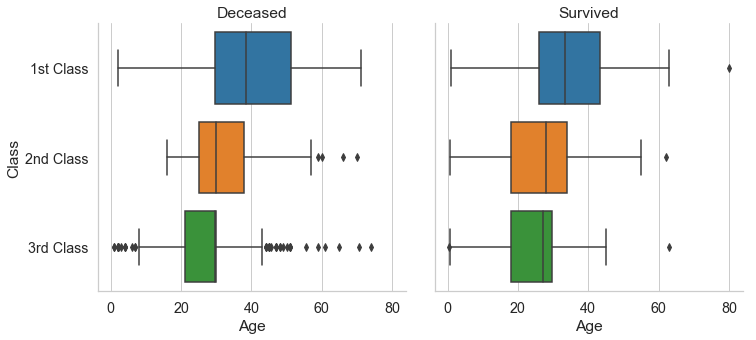

In [14]:
# Replacing the 'flag' for deceased and survivals to look nice in the graph
df_life = df_train.copy()
df_life['Survived'].replace(0,'Deceased',inplace = True)
df_life['Survived'].replace(1,'Survived', inplace = True)

# Generating the graph
f = sns.catplot(x = 'Age', y = 'Pclass', data = df_life, col = 'Survived', 
            kind = 'box', orient = 'h')

# Setting the label and titles
f.set_axis_labels(y_var = 'Class')
f.set_titles('{col_name}')

# And with the plt.yticks im setting the labels without changing the dataframe itself
plt.yticks([0,1,2],['1st Class', '2nd Class', '3rd Class'])
plt.show()

Damn, look at the outliers on deceased on 3rd class, a bunch of kids died, thats messed up :/
BUT, lets give it a closer look...

I did some quick googling and it seems that some people says that we become an adult at the age 20, so i'll filter folowing this rules:
    - Age 0 to 10 -> Child
    - Age 11 to 15 -> Pre-Teenager
    - Age 16 to 20 -> Teenager
    - Age 21 up -> Adult

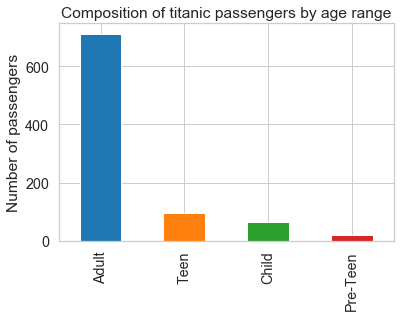

In [15]:
# Filtering to a new DataFrame by age and creating a new column with the proper value
child = df_life.loc[(df_life['Age'] <11)]
child['AgeRange'] = 'Child'

preteen = df_life.loc[(df_life['Age'] > 10)&(df_life['Age'] <= 15)]
preteen['AgeRange'] = 'Pre-Teen'

teen = df_life.loc[(df_life['Age'] > 15)&(df_life['Age'] <= 20)]
teen['AgeRange'] = 'Teen'

adult = df_life.loc[(df_life['Age'] >20)]
adult['AgeRange'] = 'Adult'

# Concatenating all the new DF's into one 
df_ages = pd.concat([child,preteen,teen,adult], axis = 0)

df_ages['AgeRange'].value_counts().plot(kind='bar')
plt.title('Composition of titanic passengers by age range')
plt.ylabel('Number of passengers')
plt.show()

Now we can filter out the dead ones :P

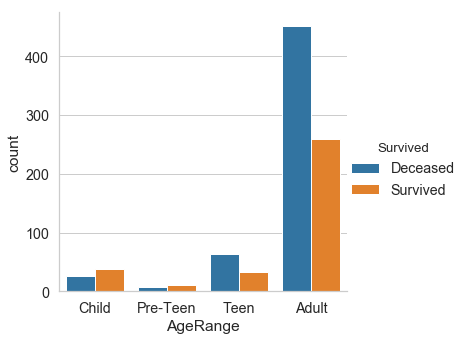

In [16]:
g = sns.catplot(x='AgeRange', hue='Survived',data=df_ages, kind='count')

In [17]:
#What about thar 4 months old newborn?
df_ages.loc[(df_ages.Age < 0.5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
803,804,Survived,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Child


Lucky little guy! he was on the 3rd class and still survived!